In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

In [27]:
df = pd.read_csv('transactions_datasets.csv')
df.head()

,datetime,tx_id,sender,recipient_type,recipient_id,amount,description
0,"2025-05-08 19:36:11,000",eb940b2e58ca43769fd56e430563db0e,fb217db7cccf4173afa7ac147ce0358d,service,81339a336c29406bb9328e9a3610ea12,488.35,mobile topup
1,"2025-02-18 11:03:38,000",f9574d7a590d468bac3750bca3558025,b4c0d9381960440689be64a33882f4a4,user,8ada206cf5cd46c4a0e4d7e3f2dca703,838.30,movie ticket
2,"2025-04-12 01:12:53,000",5d7138978e18447089dd3d61a8cd1523,3b8ae76c62e040e09b647d9f09edcba7,service,03cbf63b497f497b8c4482d2b7b60454,342.39,mobile topup
3,"2025-02-12 17:48:35,000",bc208aced40149d08a4c30dbf6227521,2ba777656efc4a7bab0471b161a44fa2,merchant,0c242320c7bb4f5a8ae5071221bf935b,646.07,theater ticket
4,"2025-02-26 16:14:34,000",e0c24b6f45de416a9cf1f925d5b82b26,4d5f341092274ace82168459349f7ff4,merchant,23182a9dd9214a579e434fc08fb352f1,321.44,utilities bill


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   datetime        2000 non-null   object 
 1   tx_id           2000 non-null   object 
 2   sender          2000 non-null   object 
 3   recipient_type  2000 non-null   object 
 4   recipient_id    2000 non-null   object 
 5   amount          2000 non-null   float64
 6   description     2000 non-null   object 
dtypes: float64(1), object(6)
memory usage: 109.5+ KB


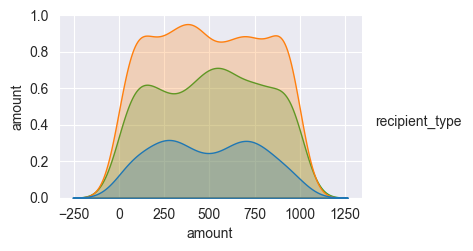

In [29]:
X = df.drop(['tx_id', 'recipient_type'], axis=1)
sns.pairplot(df.drop('tx_id', axis=1), hue='recipient_type', aspect=1.5)
plt.show()

### As we can see that recipient_type doesn't have relation to any other things here the amount as it was only the numeric values here. Now I need to try to perform the clustering through the usage of description itself.

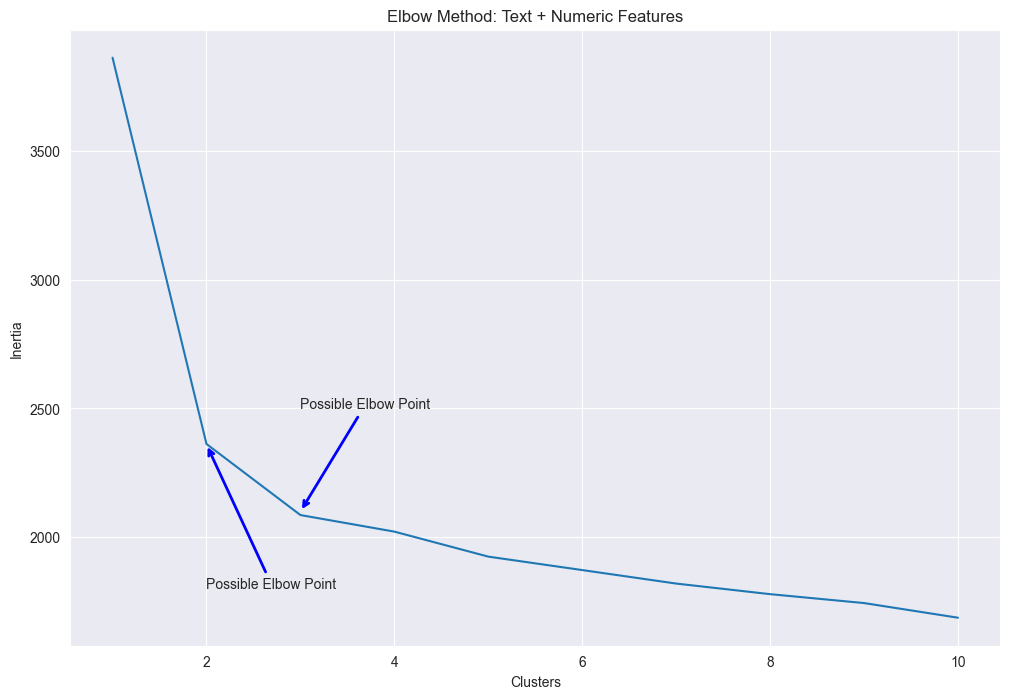

In [30]:
# by mistake, I referred the id of the transaction also the numeric value but the code runs even though.
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.sparse import hstack, csr_matrix

vect = TfidfVectorizer(max_features=1000, stop_words='english')
X_text = vect.fit_transform(df['description']) # turning the text into vector

scaler = StandardScaler()
X_amt = scaler.fit_transform(df[['amount']])
X_amt_sparse = csr_matrix(X_amt) # number to scaled.

X = hstack([X_text, X_amt_sparse])

inertias = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertias.append(km.inertia_)

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=inertias, ax=ax)
ax.set_title('Elbow Method: Text + Numeric Features')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow, later I have added it so that proper sharp turn on the line chart could be labeled as elbow.
ax.annotate('Possible Elbow Point', xy=(2, 2360), xytext=(2, 1800), xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(3, 2100), xytext=(3, 2500), xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))


plt.show()

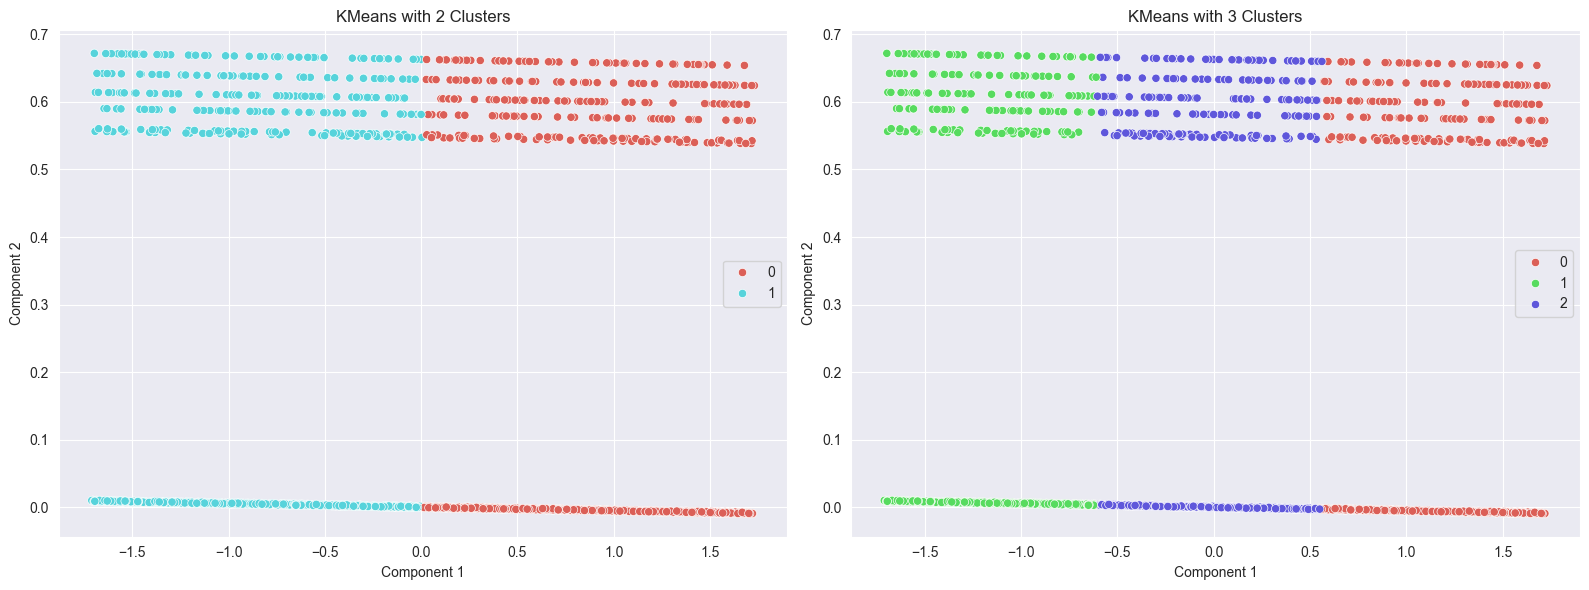

In [31]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2, random_state=42)
X_2d = svd.fit_transform(X)

km2 = KMeans(n_clusters=2, random_state=42).fit(X)
labels2 = km2.labels_

km3 = KMeans(n_clusters=3, random_state=42).fit(X)
labels3 = km3.labels_

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.scatterplot(
    x=X_2d[:, 0], y=X_2d[:, 1],
    hue=labels2,
    palette=sns.color_palette('hls', 2),
    ax=axes[0]
)
axes[0].set_title('KMeans with 2 Clusters')
axes[0].set_xlabel('Component 1')
axes[0].set_ylabel('Component 2')

sns.scatterplot(
    x=X_2d[:, 0], y=X_2d[:, 1],
    hue=labels3,
    palette=sns.color_palette('hls', 3),
    ax=axes[1]
)
axes[1].set_title('KMeans with 3 Clusters')
axes[1].set_xlabel('Component 1')
axes[1].set_ylabel('Component 2')

plt.tight_layout()
plt.show()

# Here the Clustering is such a Vague due to which I don't think it could be used in the provided example.

In [32]:
print("Goodbye, The Clustering I think will be just too much of the confusion created, and through which it will only arise the problems")

Goodbye, The Clustering I think will be just too much of the confusion created, and through which it will only arise the problems


# Created by Rohan Thapa.